## Nettoyage

In [1]:
import pandas as pd

df=pd.read_csv('data\\1raw\\taxonomy.csv', encoding='latin1')

duplicated_scientific_names = df[df.duplicated(subset="Scientific.Name")]
print(f"Nombre de doublons sur 'Scientific.Name' : {len(duplicated_scientific_names)}")


df_cleaned = df.drop_duplicates(subset='Scientific.Name')


df_cleaned.to_csv("data\\2interim\\taxonomy_cleaned.csv", index=False)

# Afficher le nombre total de lignes avant et après
print(f"Lignes avant nettoyage : {len(df)}")
print(f"Lignes après nettoyage : {len(df_cleaned)}")
print("Le fichier a été nettoyer et envoyer sur 2interim")


Nombre de doublons sur 'Scientific.Name' : 410
Lignes avant nettoyage : 960
Lignes après nettoyage : 550
Le fichier a été nettoyer et envoyer sur 2interim


## Suppression des information inutiles

In [2]:
data=pd.read_csv('data\\2interim\\taxonomy_cleaned.csv', encoding='latin1')
print(data.columns)

data = data.drop(columns=['Unnamed: 0'])
print(data.columns)


data.to_csv("data\\3processed\\taxonomy_processed.csv", index=False)



Index(['Unnamed: 0', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific.Name'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific.Name'],
      dtype='object')


## Bar Classes

Top 1 : Felidae
Top 2 : Bovidae
Top 3 : Canidae


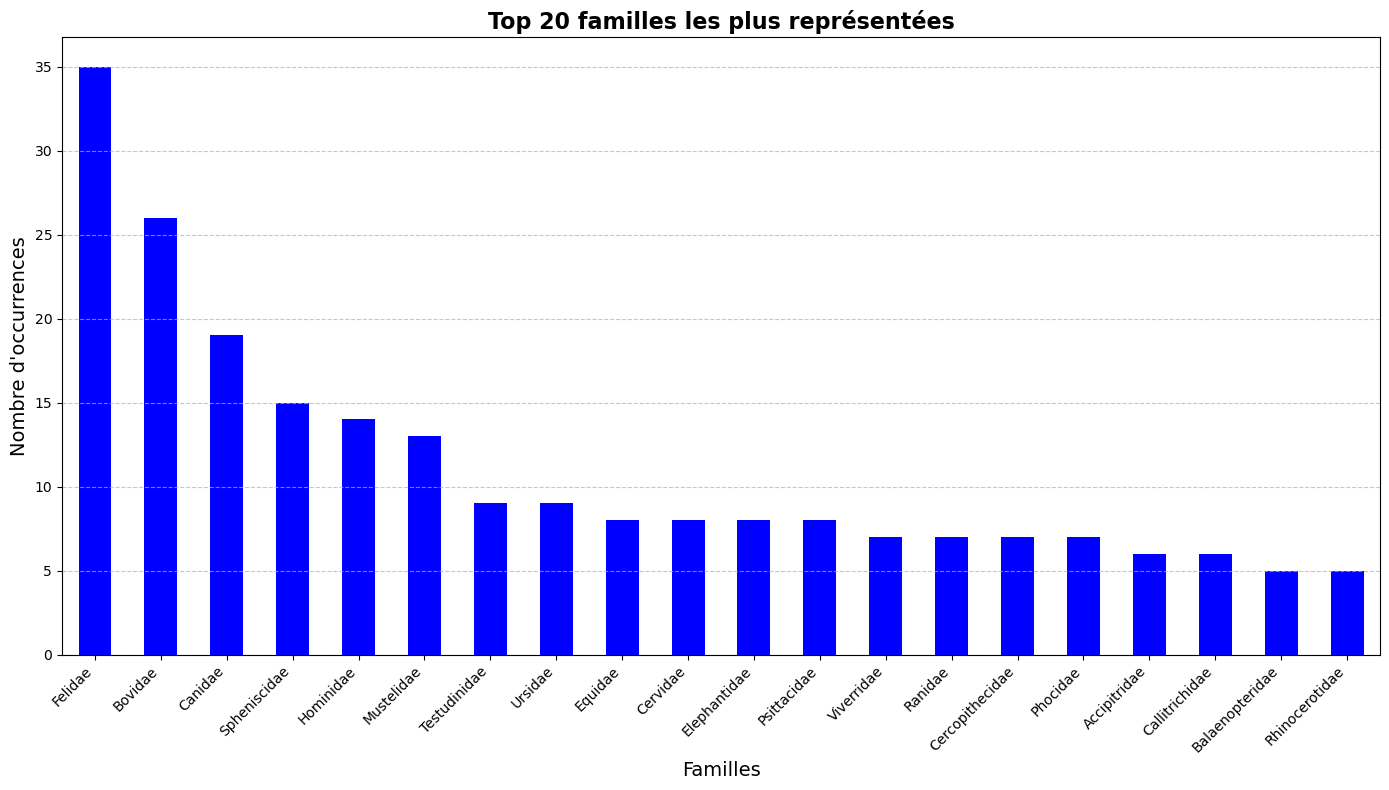

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
data = pd.read_csv("data\\3processed\\taxonomy_processed.csv")

# Obtenir les 20 familles les plus représentées
family = data['Family'].value_counts().sort_values(ascending=False).head(20)

# Afficher les 3 premières familles
top3 = family.head(3)
for i in range(len(top3)):
    print("Top "+str(i+1)+" : "+top3.index[i])



# Création du graphique
plt.figure(figsize=(14, 8))
family.plot(kind='bar', color="blue")

plt.title("Top 20 familles les plus représentées", fontsize=16, weight='bold')
plt.xlabel("Familles", fontsize=14)
plt.ylabel("Nombre d'occurrences", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotation pour rendre les labels lisibles
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [10]:
import plotly.express as px
df = pd.DataFrame(data)

# Count the species in each order
order_counts = df['Order'].value_counts().reset_index()
order_counts.columns = ['Order', 'Number of Species']

fig = px.treemap(df, 
                 path=['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Scientific.Name'], 
                 title='Taxonomy Distribution (Kingdom to Scientific Name)')

# Adjusting the size of the figure for better visibility

# Show the treemap
fig.show()

In [11]:
df = pd.DataFrame(data)



# 4. Taxonomie hiérarchique (Tree diagram)
import plotly.express as px

# Create the sunburst chart with custom width and height
fig = px.sunburst(df, 
                  path=['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Scientific.Name'], 
                  title='Taxonomie hiérarchique des espèces')

# Adjusting the size of the figure
fig.update_layout(
    width=1200,   # Adjust width
    height=800,  # Adjust height
)

# Show the figure
fig.show()
